<a href="https://colab.research.google.com/github/icyalmond6727/Sorting-Algorithms/blob/main/Sorting_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import sys
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Merge Sort, O(n) auxiliary space

def merge_sort(a, l, r): # Optimized to require no auxiliary space
    if l == r:
        return

    m = (l + r) // 2

    merge_sort(a, l, m)
    merge_sort(a, m + 1, r)

    merge(a, l, m, r)


def merge(a, l, m, r): # This is where the O(n) auxiliary space come from
    l_a = a[l : m + 1]
    r_a = a[m + 1 : r + 1]

    i = 0
    j = 0
    k = l

    while i < len(l_a) or j < len(r_a):
      if j == len(r_a):
        a[k] = l_a[i]
        i += 1
      elif i == len(l_a):
        a[k] = r_a[j]
        j += 1
      elif l_a[i] <= r_a[j]:
        a[k] = l_a[i]
        i += 1
      else:
        a[k] = r_a[j]
        j += 1
      k += 1

In [20]:
# Quick sort, O(logn) auxiliary space

def quick_sort(a, l, r):
    if l >= r:
      return

    pivot = partition(a, l, r)

    quick_sort(a, l, pivot - 1)
    quick_sort(a, pivot + 1, r)


def partition(a, l, r):
    median_of_three(a, l, r)

    pivot = a[r]

    j = l - 1

    for i in range(l, r + 1):
        if a[i] <= pivot:
          j += 1
          a[j], a[i] = a[i], a[j]

    return j


def median_of_three(a, l, r):
    m = (l + r) // 2

    if a[m] > a[r]:
      a[m], a[r] = a[r], a[m]
    if a[l] > a[r]:
      a[l], a[r] = a[r], a[l]
    if a[l] > a[m]:
      a[l], a[m] = a[m], a[l]

    a[m], a[r] = a[r], a[m]
    return a[r]

In [21]:
# Heap Sort, O(1) auxiliary space

def heap_sort(a):

    for i in range((len(a) - 2) // 2, -1, -1):
        heapify(a, len(a), i)

    for i in range(len(a) - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        heapify(a, i, 0)


def heapify(a, n, i):
    mx = i
    l = 2 * (i + 1) - 1
    r = 2 * (i + 1)

    if l < n and a[l] > a[mx]:
        mx = l
    if r < n and a[r] > a[mx]:
        mx = r

    if mx != i:
        a[i], a[mx] = a[mx], a[i]
        heapify(a, n, mx)

In [22]:
from google.colab import drive
import os

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Sorting Algorithms'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Running test1.inp...
Running test2.inp...
Running test3.inp...
Running test4.inp...
Running test5.inp...
Running test6.inp...
Running test7.inp...
Running test8.inp...
Running test9.inp...
Running test10.inp...


,Merge Sort,Quick Sort,Heap Sort,Numpy Sort
test1.inp,12261.058772,9415.510871,22629.966607,19.689770
test2.inp,12231.280983,19356.168282,21128.515120,17.877566
test3.inp,12135.801229,11679.476538,23788.218038,17.701865
test4.inp,12033.386235,9015.880348,24212.991697,17.607474
test5.inp,12321.112735,10887.670325,23892.222328,28.624950
test6.inp,10902.667811,10684.551238,24194.529384,17.707680
test7.inp,12518.955430,10839.110043,23840.866892,31.792513
test8.inp,10667.956008,10479.244289,24085.598092,18.057940
test9.inp,12086.768524,10769.561918,21720.084910,17.490240
test10.inp,11973.974897,11058.285350,23816.527442,18.008121


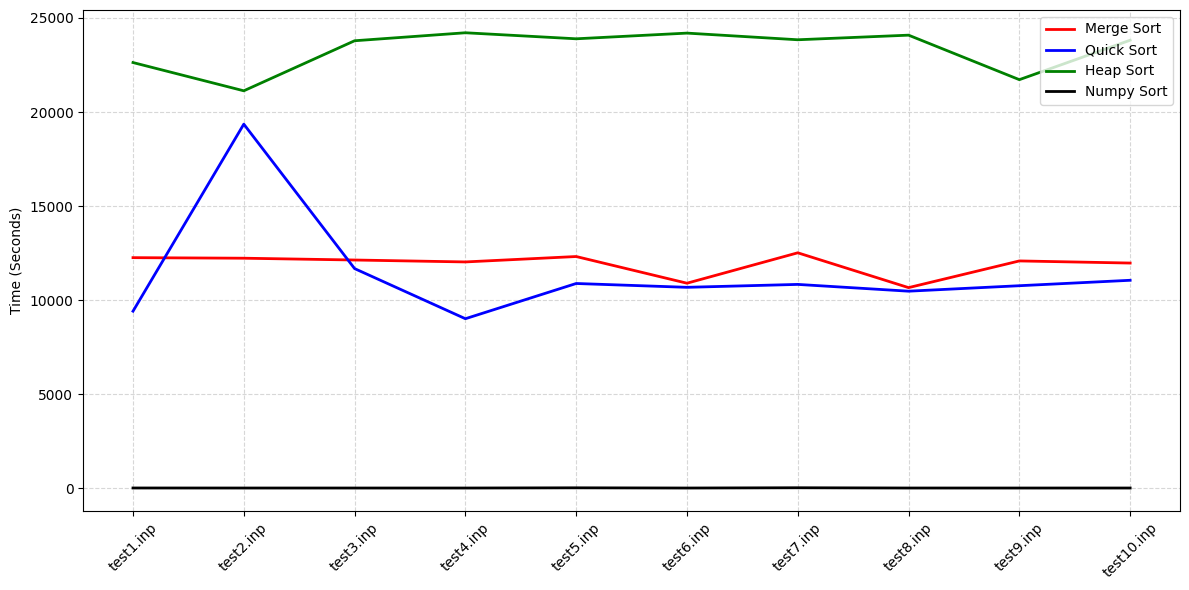

In [23]:
sys.setrecursionlimit(2000000)

files = []
merge_sort_results = []
quick_sort_results = []
heap_sort_results = []
numpy_sort_results = []

for i in range(1, 11):
    filename = f"test{i}.inp"
    files.append(filename)
    filepath = os.path.join(path, filename)

    print(f"Running {filename}...")

    arr = np.loadtxt(filepath)
    start = time.perf_counter()
    merge_sort(arr, 0, len(arr) - 1)
    merge_sort_results.append((time.perf_counter() - start) * 1000)

    arr = np.loadtxt(filepath)
    start = time.perf_counter()
    quick_sort(arr, 0, len(arr) - 1)
    quick_sort_results.append((time.perf_counter() - start) * 1000)

    arr = np.loadtxt(filepath)
    start = time.perf_counter()
    heap_sort(arr)
    heap_sort_results.append((time.perf_counter() - start) * 1000)

    arr = np.loadtxt(filepath)
    start = time.perf_counter()
    arr.sort()
    numpy_sort_results.append((time.perf_counter() - start) * 1000)

results = {
    "Merge Sort": merge_sort_results,
    "Quick Sort": quick_sort_results,
    "Heap Sort": heap_sort_results,
    "Numpy Sort": numpy_sort_results
}

df = pd.DataFrame(results, index=files)
display(df)

plt.figure(figsize=(12, 6))
plt.plot(files, results["Merge Sort"], color='red', label='Merge Sort', linewidth=2)
plt.plot(files, results["Quick Sort"], color='blue', label='Quick Sort', linewidth=2)
plt.plot(files, results["Heap Sort"], color='green', label='Heap Sort', linewidth=2)
plt.plot(files, results["Numpy Sort"], color='black', label='Numpy Sort', linewidth=2)
plt.ylabel('Time (Seconds)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()